In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer
from sklearn.metrics import accuracy_score
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_selection import SelectPercentile, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


**Reading the file**

Using Pandas to read the CSV files.

In [29]:
training_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
testing_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

**Visualizing the data**

I am using a countplot to visualize the number of non-disaster tweets (0) and the number of disaster tweets(1).

Text(0.5, 1.0, 'Number of O and 1')

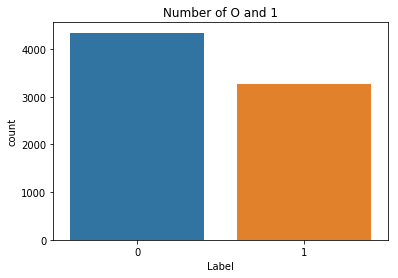

In [30]:
sns.countplot(training_data.target)
plt.xlabel('Label')
plt.title('Number of O and 1')

**Vecotorization**

I am creating a corpus of tweets from the training data. Then i am using tf-idf vectorization to fit calculate the term-frequencey and inverse-term frequency of the bag of words in both training data and testing data.
Flags used during tfidf vectorization are:-
 * use_idf : to use inverse-document-frequency for reweighting.    
 * stop_words : It is used to remove stop-words ( in , for etc) from TF-IDF calculations
 * smooth_idf : Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once.To Prevent zero divisions.

In [ ]:
corpus = []
for values in training_data['text']:
    corpus.append(values)
    
stop_words = stopwords.words('english') + list(punctuation)

In [31]:

vectorizer = TfidfVectorizer(use_idf=True, stop_words=stop_words,smooth_idf=True)
Train = vectorizer.fit_transform(corpus)
test = vectorizer.transform(testing_data['text'])

y = training_data.target


**Plotting the top features**

I am using chi-square plot to plot top 20 features calculated by TF-IDF vectorization .

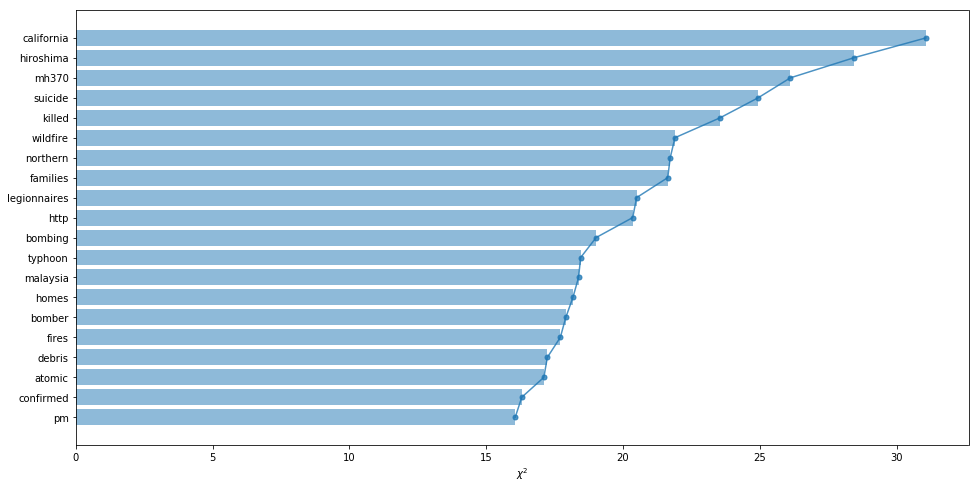

In [32]:
chi2score = chi2(Train, y)[0]
plt.figure(figsize=(16,8))
scores = list(zip(vectorizer.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

**Our Model**

I am using a ridge classifier which works on the principle of regression . We are simply learning a linear classifier that is defined by a hyperplane

In [33]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, Train, training_data["target"], cv=3, scoring="f1")
scores
clf.fit(Train, training_data["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

**Submitting the File**

In [34]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = clf.predict(test)
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [35]:
sample_submission.to_csv("submission.csv", index=False)